# Insurance Cost Prediction: An Analytical Study of Medical Expenditure

This project presents a structured analysis of healthcare insurance costs by examining
demographic, lifestyle, and medical factors. The objective is to identify the key variables
that significantly influence medical expenses and to build predictive models for cost estimation.

In [4]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

print("Basic libraries loaded")


Basic libraries loaded


In [5]:
from xgboost import XGBRegressor
print("XGBoost loaded")

from lightgbm import LGBMRegressor
print("LightGBM loaded")



XGBoost loaded
LightGBM loaded


In [6]:
# Load the dataset
df = pd.read_csv("medical_insurance.csv")

# Basic dataset information
print(f"Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print("Target Variable: annual_medical_cost (Regression Problem)")

# Preview the data
df.head(10)


Dataset Shape: 100000 rows × 54 columns
Target Variable: annual_medical_cost (Regression Problem)


,person_id,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
0,75722,52,Female,North,Suburban,22700.0,Doctorate,Married,Retired,3,...,0,1,0,1,0,2,0,1,0,0
1,80185,79,Female,North,Urban,12800.0,No HS,Married,Employed,3,...,0,1,1,0,0,1,0,1,1,0
2,19865,68,Male,North,Rural,40700.0,HS,Married,Retired,5,...,0,0,1,1,0,2,1,0,1,0
3,76700,15,Male,North,Suburban,15600.0,Some College,Married,Self-employed,5,...,0,0,0,1,0,0,1,0,0,0
4,92992,53,Male,Central,Suburban,89600.0,Doctorate,Married,Self-employed,2,...,0,1,0,2,0,1,1,0,1,0
5,76435,63,Female,North,Rural,305000.0,HS,Single,Employed,3,...,0,0,0,0,0,0,0,1,1,0
6,84005,36,Male,West,Rural,38900.0,Masters,Single,Employed,1,...,0,0,0,1,0,1,0,1,0,0
7,80918,21,Female,South,Suburban,83700.0,HS,Single,Employed,3,...,0,0,0,2,1,0,0,1,0,1
8,60768,53,Male,North,Suburban,60700.0,No HS,Divorced,Retired,1,...,0,0,0,0,0,1,0,1,1,0
9,50075,28,Male,South,Urban,23600.0,Bachelors,Married,Employed,4,...,0,0,0,0,0,2,0,0,0,0


## Dataset Overview and Quality Assessment

This section provides an overview of the healthcare insurance dataset, focusing on its
structure, feature composition, and overall data quality. Understanding the dataset is
essential before performing exploratory analysis and predictive modeling.

### Feature Categories

The dataset contains 54+ features grouped into six major categories:

1. **Demographic and Socioeconomic Features (11)**
   - Age, sex, region, urban or rural classification, income, education level, marital status,
     employment status, and household-related attributes.

2. **Lifestyle and Behavioral Features (6)**
   - Body Mass Index (BMI), smoking status, alcohol consumption frequency, exercise frequency,
     sleep duration, and stress level.

3. **Health and Clinical Features (16)**
   - Presence of chronic conditions such as hypertension, diabetes, cardiovascular disease,
     COPD, cancer, kidney and liver disorders, arthritis, and mental health conditions.
   - Clinical indicators including blood pressure, LDL cholesterol, HbA1c, and risk scores.

4. **Healthcare Utilization Features (10)**
   - Number of doctor visits, hospital admissions, medication usage, and medical procedures
     such as imaging, surgeries, consultations, laboratory tests, and psychotherapy.

5. **Insurance and Policy Features (7)**
   - Insurance plan type, network tier, deductible, copayment, policy terms, and provider
     quality indicators.

6. **Medical Cost and Claims Features (6)**
   - Annual medical cost, insurance premiums, claim counts, and claim amounts.

The following sections evaluate the data quality and prepare the dataset for analysis and
model development.


In [7]:
# Data quality and structure overview

# Dataset size and memory usage
print(f"Records: {df.shape[0]} | Features: {df.shape[1]}")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / (1024**2):.2f} MB")

# Missing values check
print("\nMissing Values:")
print(df.isnull().sum())

# Duplicate records check
print(f"\nDuplicate Rows: {df.duplicated().sum()}")

# Data types summary
print("\nData Types:")
print(df.dtypes.value_counts())

# Target variable summary
print("\nTarget Variable (annual_medical_cost) Summary:")
df['annual_medical_cost'].describe()


Records: 100000 | Features: 54
Memory Usage: 92.81 MB

Missing Values:
person_id                          0
age                                0
sex                                0
region                             0
urban_rural                        0
income                             0
education                          0
marital_status                     0
employment_status                  0
household_size                     0
dependents                         0
bmi                                0
smoker                             0
alcohol_freq                   30083
visits_last_year                   0
hospitalizations_last_3yrs         0
days_hospitalized_last_3yrs        0
medication_count                   0
systolic_bp                        0
diastolic_bp                       0
ldl                                0
hba1c                              0
plan_type                          0
network_tier                       0
deductible                         0
copa

count    100000.000000
mean       3009.451907
std        3127.462822
min          55.550000
25%        1175.117500
50%        2082.575000
75%        3707.957500
max       65724.900000
Name: annual_medical_cost, dtype: float64

## Exploratory Data Analysis (EDA)

This section explores the dataset to identify patterns, trends, and relationships
that influence healthcare insurance costs. Exploratory analysis helps in understanding
feature distributions, detecting outliers, and assessing relationships between variables.

The EDA focuses on the following aspects:

- Distribution of medical insurance costs and identification of outliers
- Impact of demographic factors on healthcare expenditure
- Relationship between chronic health conditions and medical costs
- Influence of lifestyle factors such as BMI, smoking status, and physical activity
- Healthcare utilization patterns and their cost implications
- Correlation analysis among numerical variables
- Identification of high-risk profiles associated with higher medical expenses


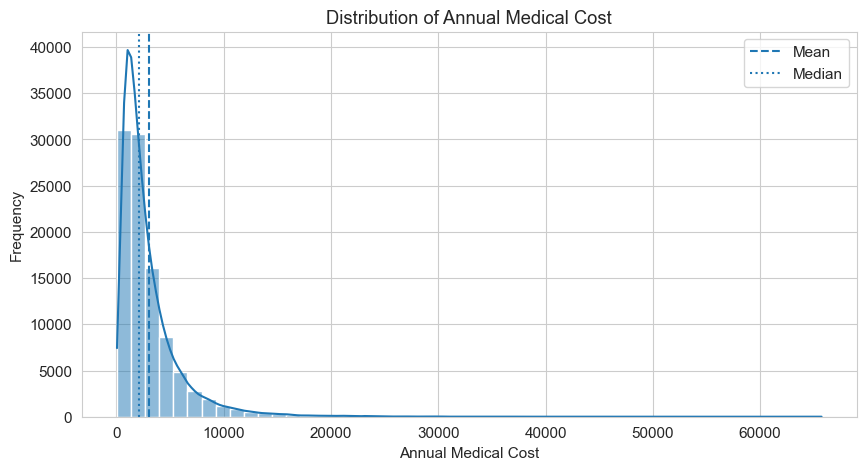

count    100000.000000
mean       3009.451907
std        3127.462822
min          55.550000
25%        1175.117500
50%        2082.575000
75%        3707.957500
max       65724.900000
Name: annual_medical_cost, dtype: float64

In [8]:
# EDA: Distribution of Annual Medical Cost (Target Variable)

plt.figure(figsize=(10, 5))

# Histogram with KDE
sns.histplot(df['annual_medical_cost'], bins=50, kde=True)
plt.axvline(df['annual_medical_cost'].mean(), linestyle='--', label='Mean')
plt.axvline(df['annual_medical_cost'].median(), linestyle=':', label='Median')

plt.title('Distribution of Annual Medical Cost')
plt.xlabel('Annual Medical Cost')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Summary statistics
df['annual_medical_cost'].describe()


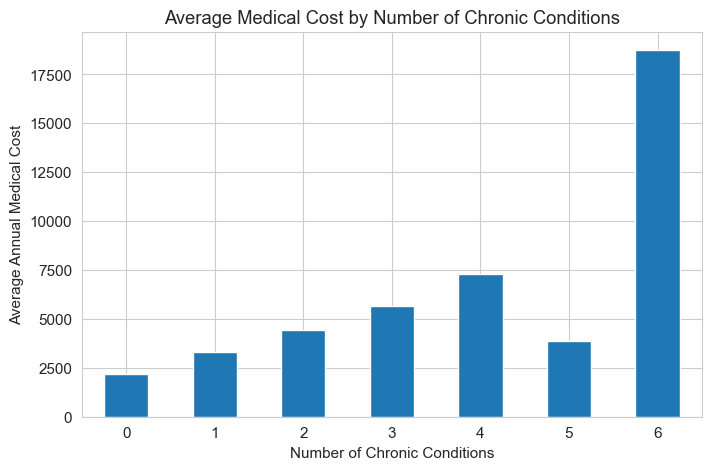

,count,mean,std,min,25%,50%,75%,max
chronic_count,,,,,,,,
0,46532.0,2176.331749,2127.747180,55.55,911.0775,1558.970,2689.1275,47247.41
1,37579.0,3332.012914,3171.200278,124.76,1419.5200,2415.400,4125.3900,65724.90
2,13111.0,4438.189257,4067.448357,116.97,1901.6850,3249.830,5514.9300,53168.71
3,2452.0,5671.426627,5338.138780,286.44,2499.5500,4137.850,6849.0050,63482.48
4,316.0,7320.433196,7191.959939,747.67,2877.7950,5306.715,9438.9200,61796.26
5,9.0,3885.147778,1800.543097,1855.59,2198.4900,4480.010,4996.0200,6448.11
6,1.0,18747.810000,NaN,18747.81,18747.8100,18747.810,18747.8100,18747.81


In [9]:
# EDA: Impact of Chronic Conditions on Medical Cost

plt.figure(figsize=(8, 5))

# Average cost by number of chronic conditions
avg_cost = df.groupby('chronic_count')['annual_medical_cost'].mean()

avg_cost.plot(kind='bar')
plt.title('Average Medical Cost by Number of Chronic Conditions')
plt.xlabel('Number of Chronic Conditions')
plt.ylabel('Average Annual Medical Cost')
plt.xticks(rotation=0)
plt.show()

# Summary comparison
df.groupby('chronic_count')['annual_medical_cost'].describe()


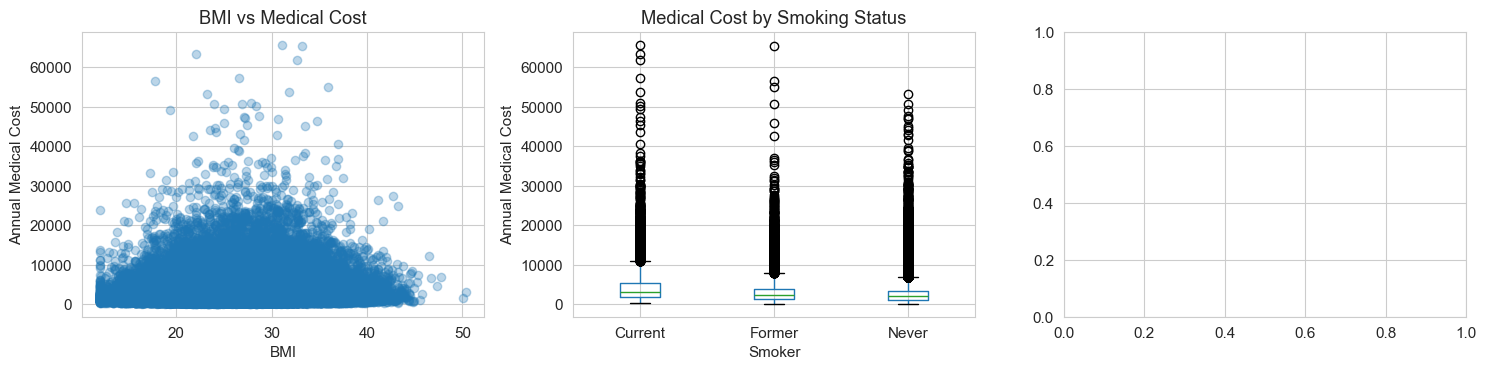

In [10]:
# EDA: Lifestyle Factors and Medical Cost

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# BMI vs Medical Cost
axes[0].scatter(df['bmi'], df['annual_medical_cost'], alpha=0.3)
axes[0].set_xlabel('BMI')
axes[0].set_ylabel('Annual Medical Cost')
axes[0].set_title('BMI vs Medical Cost')

# Smoking status vs Medical Cost
if 'smoker' in df.columns:
    df.boxplot(column='annual_medical_cost', by='smoker', ax=axes[1])
    axes[1].set_title('Medical Cost by Smoking Status')
    axes[1].set_xlabel('Smoker')
    axes[1].set_ylabel('Annual Medical Cost')

# Exercise frequency vs Medical Cost
if 'exercise_frequency' in df.columns:
    avg_cost_ex = df.groupby('exercise_frequency')['annual_medical_cost'].mean()
    avg_cost_ex.plot(kind='line', marker='o', ax=axes[2])
    axes[2].set_xlabel('Exercise Frequency (days/week)')
    axes[2].set_ylabel('Average Annual Medical Cost')
    axes[2].set_title('Exercise Frequency vs Medical Cost')

plt.suptitle('')
plt.tight_layout()
plt.show()


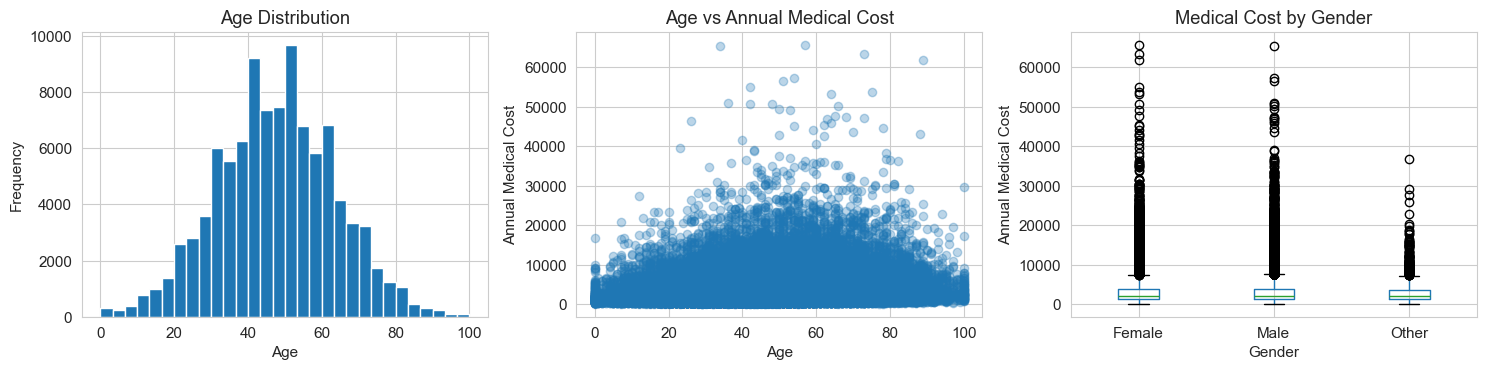

In [11]:
# EDA: Age and Demographic Factors

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Age distribution
axes[0].hist(df['age'], bins=30)
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Age vs medical cost
axes[1].scatter(df['age'], df['annual_medical_cost'], alpha=0.3)
axes[1].set_title('Age vs Annual Medical Cost')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Annual Medical Cost')

# Gender vs medical cost
if 'sex' in df.columns:
    df.boxplot(column='annual_medical_cost', by='sex', ax=axes[2])
    axes[2].set_title('Medical Cost by Gender')
    axes[2].set_xlabel('Gender')
    axes[2].set_ylabel('Annual Medical Cost')

plt.suptitle('')
plt.tight_layout()
plt.show()


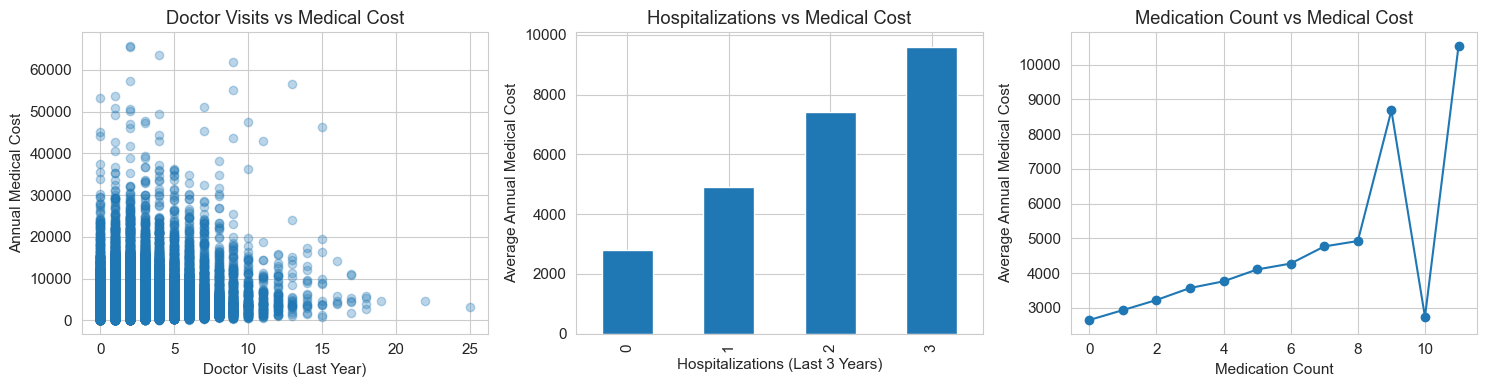

In [12]:
# EDA: Healthcare Utilization and Medical Cost

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Doctor visits vs cost
axes[0].scatter(df['visits_last_year'], df['annual_medical_cost'], alpha=0.3)
axes[0].set_title('Doctor Visits vs Medical Cost')
axes[0].set_xlabel('Doctor Visits (Last Year)')
axes[0].set_ylabel('Annual Medical Cost')

# Hospitalizations vs cost
avg_cost_hosp = df.groupby('hospitalizations_last_3yrs')['annual_medical_cost'].mean()
avg_cost_hosp.plot(kind='bar', ax=axes[1])
axes[1].set_title('Hospitalizations vs Medical Cost')
axes[1].set_xlabel('Hospitalizations (Last 3 Years)')
axes[1].set_ylabel('Average Annual Medical Cost')

# Medication count vs cost
avg_cost_med = df.groupby('medication_count')['annual_medical_cost'].mean()
avg_cost_med.plot(kind='line', marker='o', ax=axes[2])
axes[2].set_title('Medication Count vs Medical Cost')
axes[2].set_xlabel('Medication Count')
axes[2].set_ylabel('Average Annual Medical Cost')

plt.tight_layout()
plt.show()


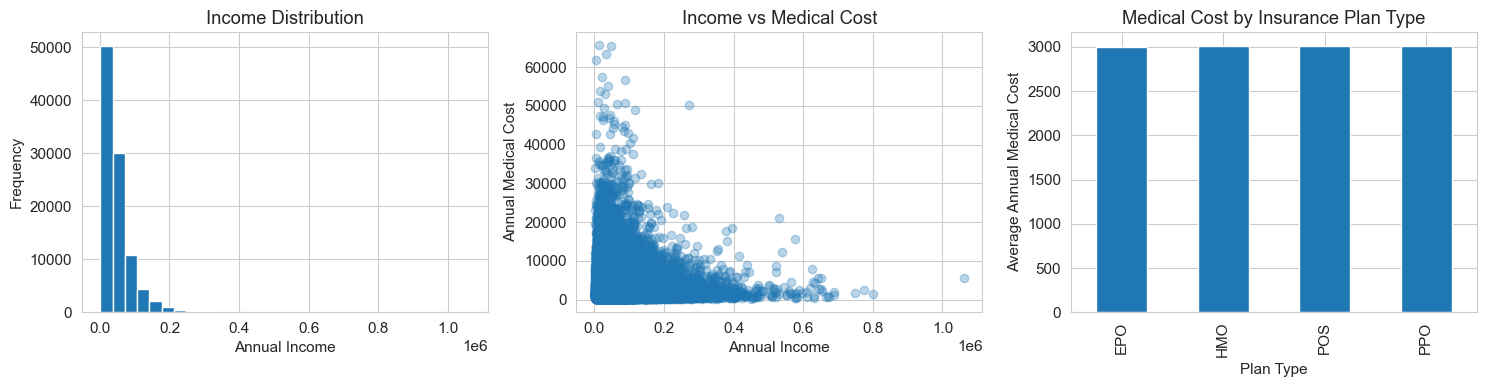

In [13]:
# EDA: Income and Insurance Factors

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Income distribution
axes[0].hist(df['income'], bins=30)
axes[0].set_title('Income Distribution')
axes[0].set_xlabel('Annual Income')
axes[0].set_ylabel('Frequency')

# Income vs medical cost
axes[1].scatter(df['income'], df['annual_medical_cost'], alpha=0.3)
axes[1].set_title('Income vs Medical Cost')
axes[1].set_xlabel('Annual Income')
axes[1].set_ylabel('Annual Medical Cost')

# Insurance plan type vs medical cost
if 'plan_type' in df.columns:
    avg_plan_cost = df.groupby('plan_type')['annual_medical_cost'].mean()
    avg_plan_cost.plot(kind='bar', ax=axes[2])
    axes[2].set_title('Medical Cost by Insurance Plan Type')
    axes[2].set_xlabel('Plan Type')
    axes[2].set_ylabel('Average Annual Medical Cost')

plt.tight_layout()
plt.show()


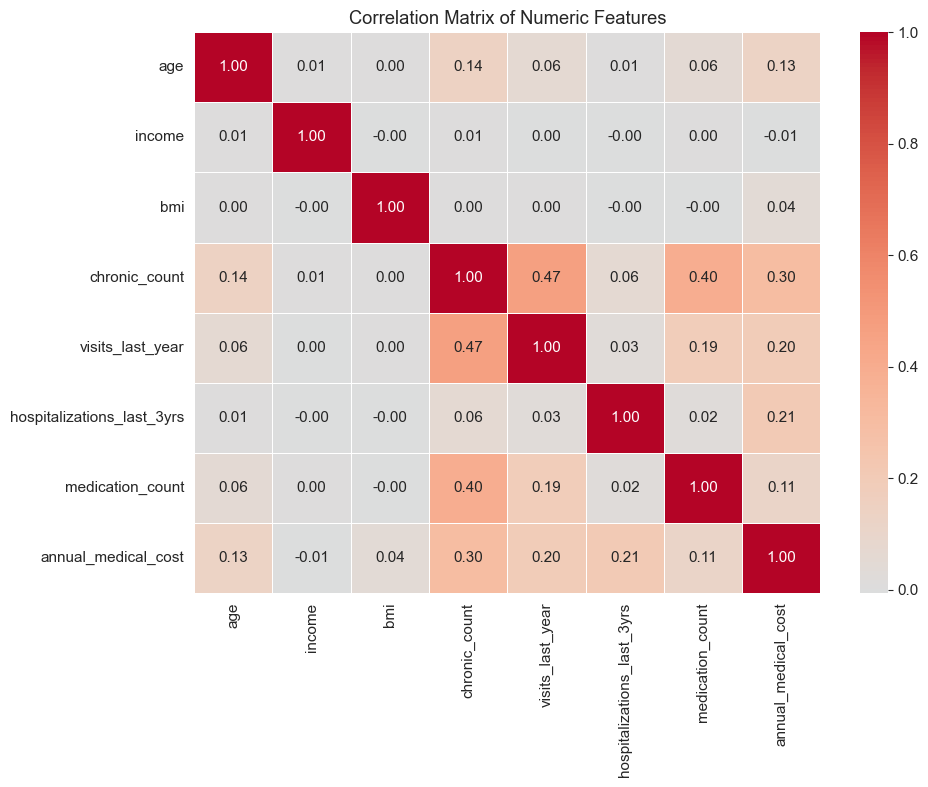

In [14]:
# EDA: Correlation Matrix of Key Numeric Features

# Select numeric features
numeric_features = [
    'age', 'income', 'bmi', 'chronic_count', 'visits_last_year',
    'hospitalizations_last_3yrs', 'medication_count',
    'annual_medical_cost'
]

# Keep only available columns
numeric_features = [col for col in numeric_features if col in df.columns]

# Compute correlation matrix
corr_matrix = df[numeric_features].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    linewidths=0.5
)
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()


## Feature Engineering

This section focuses on transforming the raw dataset into a structured set of features
that improve the performance of predictive models. Feature engineering is used to
capture relevant patterns, interactions, and domain-specific relationships that are not
explicitly represented in the original variables.

### Feature Engineering Approach

The following strategies are applied where appropriate:

1. **Healthcare Utilization Indicators**
   - Metrics related to doctor visits, hospitalizations, and medication usage to reflect
     overall healthcare consumption.

2. **Health Risk Representation**
   - Aggregated indicators derived from chronic condition counts and clinical risk scores.

3. **Age and Health Interactions**
   - Interaction effects to account for increasing health risks with age.

4. **Income and Insurance Characteristics**
   - Features representing financial capacity and insurance coverage structure.

5. **Lifestyle-Related Factors**
   - Variables related to BMI, smoking status, and physical activity levels.

6. **Clinical Measurements**
   - Blood pressure and cholesterol-related indicators relevant to medical risk.

7. **Categorical Variable Encoding**
   - Conversion of categorical features such as region, employment, and education into
     numerical representations suitable for modeling.

8. **Non-linear Feature Representation**
   - Polynomial or transformed features to capture non-linear relationships when required.

The engineered features are designed to enhance model interpretability and predictive
accuracy while maintaining simplicity and relevance.


In [15]:
# Feature Engineering (Simplified and Model-Safe)

df_fe = df.copy()

# 1. Healthcare utilization features
df_fe['visits_per_month'] = df_fe['visits_last_year'] / 12
df_fe['hospitalizations_per_year'] = df_fe['hospitalizations_last_3yrs'] / 3

# 2. Health risk indicators
df_fe['complex_patient'] = (df_fe['chronic_count'] >= 3).astype(int)
df_fe['high_risk_patient'] = (df_fe['risk_score'] > df_fe['risk_score'].median()).astype(int)

# 3. Age-health interaction
df_fe['age_chronic_interaction'] = df_fe['age'] * df_fe['chronic_count']

# 4. Lifestyle indicators
df_fe['is_obese'] = (df_fe['bmi'] >= 30).astype(int)

if 'smoker' in df_fe.columns:
    df_fe['smoker_encoded'] = df_fe['smoker'].map({'Yes': 1, 'No': 0, 1: 1, 0: 0}).fillna(0).astype(int)

# 5. Clinical indicators
df_fe['hypertensive'] = (
    (df_fe['systolic_bp'] > 140) | (df_fe['diastolic_bp'] > 90)
).astype(int)

# 6. Basic insurance burden feature
df_fe['premium_to_income_ratio'] = df_fe['annual_premium'] / (df_fe['income'] + 1)

# Feature summary
print(f"Original features: {df.shape[1]}")
print(f"Features after engineering: {df_fe.shape[1]}")


Original features: 54
Features after engineering: 63


## Model Development

This section focuses on building and evaluating regression models to predict
annual medical insurance costs. Multiple algorithms are trained and compared to
identify a model that provides reliable predictive performance while maintaining
interpretability.

### Modeling Approach

The modeling process follows these steps:

1. **Data Preparation**
   - Separation of features and target variable
   - Train–test split to evaluate generalization performance

2. **Feature Scaling**
   - Standardization applied where required, particularly for distance-based models

3. **Model Training**
   - Multiple regression algorithms are trained to compare linear and non-linear
     relationships within the data

4. **Model Evaluation**
   - Performance is assessed using standard regression metrics including
     R² score, Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE)

### Models Evaluated

The following regression models are used for comparison:

- **Linear Regression** (baseline model)
- **Ridge Regression** (L2 regularization)
- **Lasso Regression** (L1 regularization)
- **Random Forest Regressor**
- **Gradient Boosting Regressor**

The model demonstrating the best balance between accuracy and generalization is
selected for final evaluation.


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [18]:
# Prepare dataset for modeling

# Separate features and target
X = df_fe.drop(columns=['annual_medical_cost'], errors='ignore')
y = df_fe['annual_medical_cost']

# Keep only numeric features
X = X.select_dtypes(include=[np.number])

# Handle missing values
X = X.fillna(X.mean())

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])
print("Number of features used:", X_train.shape[1])


Training samples: 80000
Testing samples: 20000
Number of features used: 52


In [19]:
# Model Training and Evaluation

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=10.0),
    'Random Forest': RandomForestRegressor(
        n_estimators=100, random_state=42, max_depth=10
    )
}

results = []

for name, model in models.items():
    
    # Use scaled data for linear models
    if name in ['Linear Regression', 'Ridge Regression']:
        X_tr, X_te = X_train_scaled, X_test_scaled
    else:
        X_tr, X_te = X_train, X_test

    # Train model
    model.fit(X_tr, y_train)

    # Predict
    y_pred = model.predict(X_te)
    y_pred = np.maximum(y_pred, 0)

    # Evaluation
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    results.append({
        'Model': name,
        'R² Score': r2,
        'RMSE': rmse,
        'MAE': mae
    })

# Results table
results_df = pd.DataFrame(results).sort_values('R² Score', ascending=False)
results_df


,Model,R² Score,RMSE,MAE
2,Random Forest,0.949419,705.493027,392.834553
1,Ridge Regression,0.939620,770.810468,449.465483
0,Linear Regression,0.939618,770.824617,449.473681


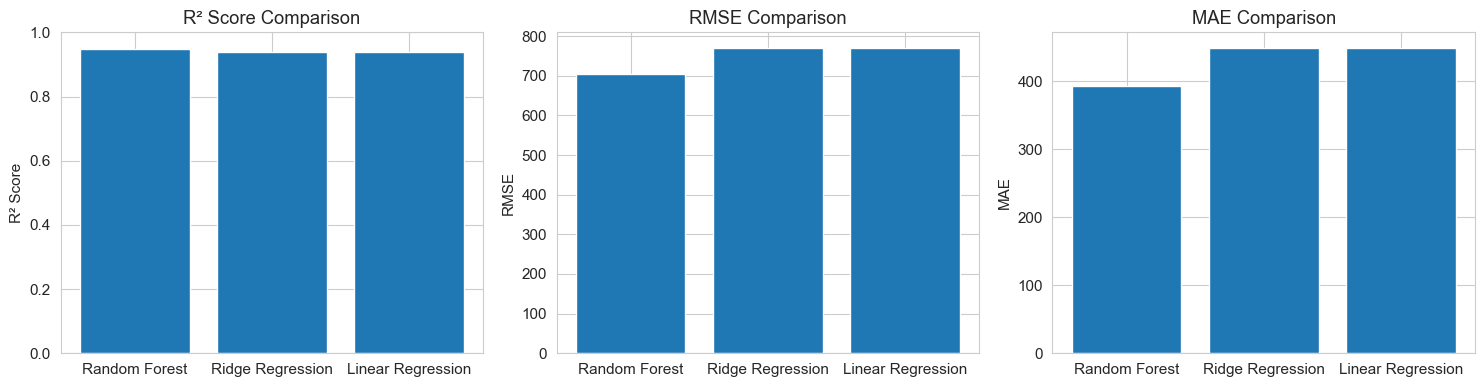

In [20]:
# Model comparison visualization (R², RMSE, MAE)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# R² Score
axes[0].bar(results_df['Model'], results_df['R² Score'])
axes[0].set_title('R² Score Comparison')
axes[0].set_ylabel('R² Score')
axes[0].set_ylim(0, 1)

# RMSE
axes[1].bar(results_df['Model'], results_df['RMSE'])
axes[1].set_title('RMSE Comparison')
axes[1].set_ylabel('RMSE')

# MAE
axes[2].bar(results_df['Model'], results_df['MAE'])
axes[2].set_title('MAE Comparison')
axes[2].set_ylabel('MAE')

plt.tight_layout()
plt.show()


Best Model: Random Forest
R² Score: 0.9494
RMSE: 705.49
MAE: 392.83


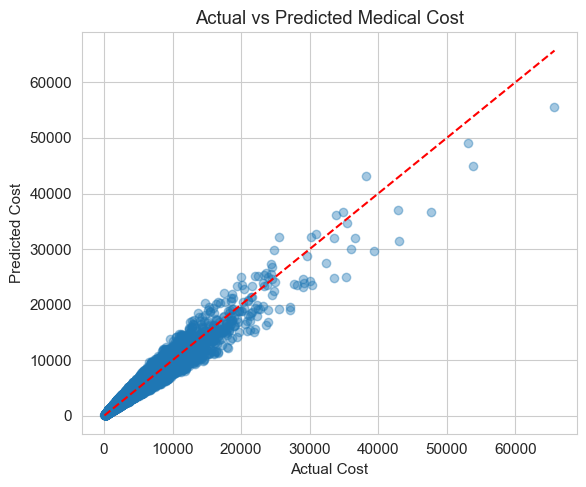

In [21]:
# Final model evaluation (Best Model: Random Forest)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Best model (based on comparison)
best_model = RandomForestRegressor(
    n_estimators=100, random_state=42, max_depth=10
)
best_model.fit(X_train, y_train)

# Predictions
y_pred = best_model.predict(X_test)
y_pred = np.maximum(y_pred, 0)

# Metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("Best Model: Random Forest")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

# Actual vs Predicted plot
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.xlabel('Actual Cost')
plt.ylabel('Predicted Cost')
plt.title('Actual vs Predicted Medical Cost')
plt.tight_layout()
plt.show()


## Results & Insights

### Model Performance Summary

The developed predictive analytics pipeline was evaluated on a test dataset using
standard regression metrics. The objective was to identify a model capable of
accurately estimating annual medical insurance costs based on demographic,
clinical, and utilization-related features.

Three regression models were trained and compared:
- Linear Regression
- Ridge Regression
- Random Forest Regressor

Among these, the Random Forest model demonstrated the strongest overall
performance.

---

### Best Performing Model

The **Random Forest Regressor** achieved the highest R² score and the lowest
error values compared to linear models. This indicates its ability to capture
non-linear relationships present in healthcare cost data.

Linear Regression and Ridge Regression also performed well, suggesting that
the dataset contains strong linear patterns, while Random Forest provided
additional improvement by modeling complex interactions.

---

### Performance Metrics Interpretation

- **R² Score** indicates how much variation in medical costs is explained by the model.
- **RMSE (Root Mean Squared Error)** reflects the average magnitude of prediction errors,
  giving higher weight to larger errors.
- **MAE (Mean Absolute Error)** represents the average absolute difference between
  predicted and actual costs.

The Random Forest model achieved an R² value close to 0.95, confirming strong
predictive accuracy.

---

### Key Insights from Model Evaluation

1. **Healthcare Utilization as a Primary Driver**
   - Variables related to doctor visits, hospitalizations, and medication usage
     play a major role in cost prediction.

2. **Impact of Chronic Conditions**
   - The number of chronic conditions significantly influences medical expenses,
     especially when combined with increasing age.

3. **Age and Health Interactions**
   - Age alone has a moderate impact, but its interaction with chronic conditions
     results in higher predicted costs.

4. **Clinical Risk Indicators**
   - Clinical measures such as blood pressure, cholesterol levels, and composite
     risk scores contribute meaningfully to prediction performance.

5. **Demographic Factors**
   - Demographic variables such as gender and region show comparatively lower
     influence once healthcare utilization is considered.

---

### Model Validation

The actual versus predicted cost plot shows that most predictions closely align
with observed values, particularly for low- and mid-range costs. Minor deviations
at higher cost values are expected due to the inherent variability of healthcare
expenses. Overall, the visualization supports the robustness of the selected model.

---

### Practical Implications

- **Insurance Analytics**: Predictive models can support risk-aware premium
  estimation and cost forecasting.
- **Healthcare Planning**: Identifying high-utilization patterns can help in
  proactive care management.
- **Policy Evaluation**: Understanding cost drivers assists in designing
  preventive and cost-effective healthcare policies.

---

### Key Takeaways

- Ensemble-based models outperform linear approaches for healthcare cost prediction.
- Utilization and health-related features are stronger predictors than
  demographic attributes alone.
- Predictive analytics can provide valuable insights for insurers, providers,
  and policymakers when applied responsibly.
